# Results: Classification of groups 

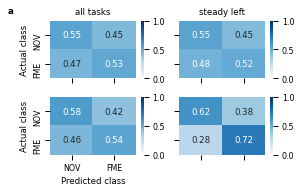

In [11]:
import pickle 
import pandas as pd 
from pathlib import Path
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

folder = Path.cwd().parent / 'results' / 'group_classification'
classifier = 'lda'

# Force feature 
with open(str(folder / 'force' / 'other_features' / 'all' / classifier/ 'confmat.pkl'), 'rb') as handle:
    confmat_force = pickle.load(handle) 
with open(str(folder / 'force' / 'other_features' / 'steady_left' / classifier/ 'confmat.pkl'), 'rb') as handle:
    stl_force = pickle.load(handle)

# EEG feature
with open(str(folder / 'eeg' / 'other_features' / 'all' / classifier/ 'confmat.pkl'), 'rb') as handle:
    confmat_eeg = pickle.load(handle)
with open(str(folder / 'eeg' / 'other_features' / 'steady_left' / classifier/ 'confmat.pkl'), 'rb') as handle:
    stl_eeg = pickle.load(handle)

pal = cmap = sns.color_palette(0, 20, as_cmap=True)
sns.set_context('paper', font_scale = .9)
labels = ["NOV", "FME"]
cm = 1/2.54
fig, axes = plt.subplots(2,2, figsize = (11*cm, 7*cm))

#eeg
conf_mat_eeg = pd.DataFrame(np.mean(confmat_eeg, axis = 0), columns = labels, index = labels)
conf_mat_eeg.index.name = 'Actual class'
conf_mat_eeg.columns.name = 'Predicted class'
sns.heatmap(conf_mat_eeg, cmap= 'Blues', annot=True, fmt='.2', vmin = 0, vmax = 1, ax = axes[0,0])
axes[0,0].set_xticklabels([])
axes[0,0].set_xlabel('')
axes[0,0].set_title('all tasks')
axes[0,0].text(-1, -0.25, "a", horizontalalignment='left', size='medium', color='black', weight='semibold')

conf_mat_eeg = pd.DataFrame(np.mean(stl_eeg, axis = 0), columns = labels, index = labels)
conf_mat_eeg.index.name = 'Actual class'
conf_mat_eeg.columns.name = 'Predicted class'
sns.heatmap(conf_mat_eeg, cmap= 'Blues', annot=True, fmt='.2', vmin = 0, vmax = 1, ax = axes[0,1])
axes[0,1].set_xticklabels([])
axes[0,1].set_xlabel('')
axes[0,1].set_yticklabels([])
axes[0,1].set_ylabel('')
axes[0,1].set_title('steady left')

#force
conf_mat_force = pd.DataFrame(np.mean(confmat_force,axis = 0), columns = labels, index = labels)
conf_mat_force.index.name = 'Actual class'
conf_mat_force.columns.name = 'Predicted class'
sns.heatmap(conf_mat_force, cmap= 'Blues', annot=True, fmt='.2', vmin = 0, vmax = 1, ax = axes[1,0])

conf_mat_force = pd.DataFrame(np.mean(stl_force, axis = 0), columns = labels, index = labels)
conf_mat_force.index.name = 'Actual class'
conf_mat_force.columns.name = 'Predicted class'
sns.heatmap(conf_mat_force, cmap= 'Blues', annot=True, fmt='.2', vmin = 0, vmax = 1, ax = axes[1,1])
axes[1,1].set_xticklabels([])
axes[1,1].set_xlabel('')
axes[1,1].set_yticklabels([])
axes[1,1].set_ylabel('')

fig.tight_layout()

In [9]:
with open(str(folder / 'eeg'/ 'dmd' / 'all'/ classifier/ 'classification_report.pkl'), 'rb') as handle:
    reports_eeg_all = pickle.load(handle)
eeg_results_all = pd.DataFrame()
eeg_results_all['accuracy'] = [reports_eeg_all[i][0]['accuracy'] for i in range(10)]
eeg_results_all['f1'] = [reports_eeg_all[i][0]['macro avg']['f1-score'] for i in range(10)]
eeg_results_all['precision'] = [reports_eeg_all[i][0]['macro avg']['precision'] for i in range(10)]
eeg_results_all['recall'] = [reports_eeg_all[i][0]['macro avg']['recall'] for i in range(10)]
eeg_results_all['data'] = 'eeg all'

with open(str(folder / 'eeg'/ 'other_features' / 'steady_left'/ classifier/ 'classification_report.pkl'), 'rb') as handle:
    reports_eeg_stl = pickle.load(handle)
eeg_results_stl = pd.DataFrame()
eeg_results_stl['accuracy'] = [reports_eeg_stl[i][0]['accuracy'] for i in range(10)]
eeg_results_stl['f1'] = [reports_eeg_stl[i][0]['macro avg']['f1-score'] for i in range(10)]
eeg_results_stl['precision'] = [reports_eeg_stl[i][0]['macro avg']['precision'] for i in range(10)]
eeg_results_stl['recall'] = [reports_eeg_stl[i][0]['macro avg']['recall'] for i in range(10)]
eeg_results_stl['data'] = 'eeg steady left'

with open(str(folder / 'force'/ 'other_features' / 'all'/ classifier/ 'classification_report.pkl'), 'rb') as handle:
    reports_force_all = pickle.load(handle)
force_results_all = pd.DataFrame()
force_results_all['accuracy'] = [reports_force_all[i][0]['accuracy'] for i in range(10)]
force_results_all['f1'] = [reports_force_all[i][0]['macro avg']['f1-score'] for i in range(10)]
force_results_all['precision'] = [reports_force_all[i][0]['macro avg']['precision'] for i in range(10)]
force_results_all['recall'] = [reports_force_all[i][0]['macro avg']['recall'] for i in range(10)]
force_results_all['data'] = 'force all'

with open(str(folder / 'force'/ 'other_features' / 'steady_left'/ classifier/ 'classification_report.pkl'), 'rb') as handle:
    reports_force_stl = pickle.load(handle)
force_results_stl = pd.DataFrame()
force_results_stl['accuracy'] = [reports_force_stl[i][0]['accuracy'] for i in range(10)]
force_results_stl['f1'] = [reports_force_stl[i][0]['macro avg']['f1-score'] for i in range(10)]
force_results_stl['precision'] = [reports_force_stl[i][0]['macro avg']['precision'] for i in range(10)]
force_results_stl['recall'] = [reports_force_stl[i][0]['macro avg']['recall'] for i in range(10)]
force_results_stl['data'] = 'force steady left'

results = pd.concat([eeg_results_all, eeg_results_stl,
                    force_results_all, force_results_stl])
results = results.groupby('data').describe().loc[:, (slice(None), ('mean','std'))]
out_file = 'other_features_' + classifier + '_classification_report_group_stats.csv'
results.to_csv(str(Path.cwd().parent / 'results' / out_file))
results

accuracy                  f1           precision            \
                       mean       std      mean       std      mean       std   
data                                                                            
eeg all            0.532407  0.072037  0.517812  0.079337  0.552923  0.092768   
eeg steady left    0.514371  0.108903  0.495472  0.103131  0.531491  0.086510   
force all          0.500268  0.086530  0.496447  0.087237  0.558757  0.052161   
force steady left  0.622979  0.095428  0.605675  0.107345  0.647951  0.099872   

                     recall            
                       mean       std  
data                                   
eeg all            0.551052  0.091366  
eeg steady left    0.535521  0.086209  
force all          0.563097  0.054009  
force steady left  0.669900  0.111003